In [5]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import clear_output

In [6]:
df = pd.read_csv('russian_demography.csv')
df = df.dropna()

In [7]:
def input_coloumn(df, prompt):
    coloumns = list(filter(lambda x: is_numeric_dtype(df[x].dtype), df))
    for i, name in enumerate(coloumns):
        print(f'{i + 1})', name)
    index = int(input(prompt))
    return coloumns[index - 1]

def input_region(df, prompt):
    regions = list(df['region'].unique())
    for i, region in enumerate(regions):
        print(f'{i + 1})', region)
    index = int(input(prompt))
    return regions[index - 1]

In [8]:
print("Введите номер для значения по оси Х")
x_coloumn = input_coloumn(df, "X:")
clear_output(wait = True)
print("Введите номер для значения по оси У")
y_coloumn = input_coloumn(df, "Y:")
clear_output(wait = True)
print("Введите номер региона для предсказания")
region = input_region(df, "Region:")
clear_output(wait = False)

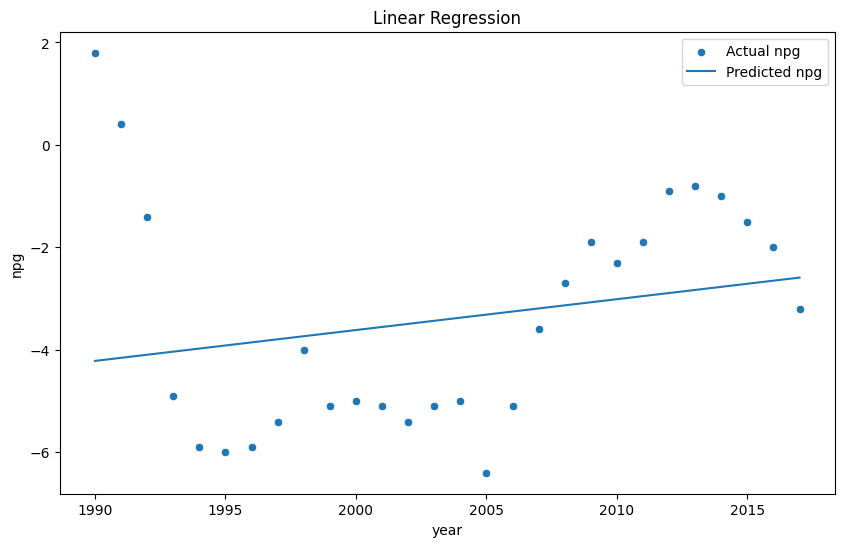

In [9]:
regioned_df = df[df['region'] == region]
X = regioned_df[[x_coloumn]]
Y = regioned_df[y_coloumn] 

regression = LinearRegression()
regression.fit(X, Y)

y_pred = regression.predict(X)

# Преобразование в одномерные массивы
X = X.values.ravel()
Y = Y.values.ravel()
y_pred = y_pred.ravel()  

# Создание графика
plt.figure(figsize=(10, 6))

# Точечная диаграмма для фактических данных
sns.scatterplot(x=X, y=Y, label='Actual npg')

# Линейная диаграмма для предсказанных данных
sns.lineplot(x=X, y=y_pred, label='Predicted npg')

# Настройка меток и заголовка
plt.xlabel(x_coloumn)
plt.ylabel(y_coloumn)
plt.legend()
plt.title('Linear Regression')

# Отображение графика
plt.show()

In [11]:
x_to_predict = float(input(f'{x_coloumn} to predict: '))
predict = pd.DataFrame([[x_to_predict]], columns=[x_coloumn])
print(f'Предсказание {y_coloumn}: ', regression.predict(predict)[0])

Предсказание npg:  1.8067870826491514
